<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1D" data-toc-modified-id="1D-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1D</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Ridge:-gaussian-kernel" data-toc-modified-id="Ridge:-gaussian-kernel-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ridge: gaussian kernel</a></span></li><li><span><a href="#Ridge:-polynominal-kernel" data-toc-modified-id="Ridge:-polynominal-kernel-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ridge: polynominal kernel</a></span></li><li><span><a href="#Ridge:-natrual-quadratic-splines" data-toc-modified-id="Ridge:-natrual-quadratic-splines-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ridge: natrual quadratic splines</a></span></li><li><span><a href="#Support-vector-machine:-gaussian-kernel" data-toc-modified-id="Support-vector-machine:-gaussian-kernel-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Support vector machine: gaussian kernel</a></span></li><li><span><a href="#Local-weighted-average-(kernel-regression):--k-neighbors-$\oplus$-uniform-kernel" data-toc-modified-id="Local-weighted-average-(kernel-regression):--k-neighbors-$\oplus$-uniform-kernel-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Local weighted average (kernel regression):  k-neighbors $\oplus$ uniform kernel</a></span></li><li><span><a href="#Local-weighted-average-(kernel-regression):-radius-neighbors-$\oplus$-uniform-kernel" data-toc-modified-id="Local-weighted-average-(kernel-regression):-radius-neighbors-$\oplus$-uniform-kernel-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Local weighted average (kernel regression): radius neighbors $\oplus$ uniform kernel</a></span></li><li><span><a href="#Local-weighted-average-(kernel-regression):-k-neighbors-$\oplus$--tri-cube-kernel" data-toc-modified-id="Local-weighted-average-(kernel-regression):-k-neighbors-$\oplus$--tri-cube-kernel-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Local weighted average (kernel regression): k-neighbors $\oplus$  tri-cube kernel</a></span></li><li><span><a href="#local-regression:-k-neighbors-$\oplus$-linear-$\oplus$-tri-cube-kernel" data-toc-modified-id="local-regression:-k-neighbors-$\oplus$-linear-$\oplus$-tri-cube-kernel-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>local regression: k-neighbors $\oplus$ linear $\oplus$ tri-cube kernel</a></span></li><li><span><a href="#local-regression:-k-neighbors-$\oplus$-quadratic-$\oplus$-tri-cube-kernel" data-toc-modified-id="local-regression:-k-neighbors-$\oplus$-quadratic-$\oplus$-tri-cube-kernel-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>local regression: k-neighbors $\oplus$ quadratic $\oplus$ tri-cube kernel</a></span></li><li><span><a href="#Gaussian-process" data-toc-modified-id="Gaussian-process-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Gaussian process</a></span></li><li><span><a href="#Decision--tree" data-toc-modified-id="Decision--tree-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Decision  tree</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>AdaBoost</a></span></li><li><span><a href="#Gradient-boosting-decision-tree" data-toc-modified-id="Gradient-boosting-decision-tree-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>Gradient boosting decision tree</a></span></li><li><span><a href="#Multi-layer-Perceptron-regressor" data-toc-modified-id="Multi-layer-Perceptron-regressor-1.16"><span class="toc-item-num">1.16&nbsp;&nbsp;</span>Multi-layer Perceptron regressor</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.17"><span class="toc-item-num">1.17&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#2D" data-toc-modified-id="2D-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2D</a></span><ul class="toc-item"><li><span><a href="#data" data-toc-modified-id="data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#Spline-ridge-with-explicit-knots" data-toc-modified-id="Spline-ridge-with-explicit-knots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Spline ridge with explicit knots</a></span></li><li><span><a href="#Ridge-with-B-spline-kernel" data-toc-modified-id="Ridge-with-B-spline-kernel-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ridge with B-spline kernel</a></span></li><li><span><a href="#ridge-with-gaussian-kernel" data-toc-modified-id="ridge-with-gaussian-kernel-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>ridge with gaussian kernel</a></span></li><li><span><a href="#$\epsilon$-SVR-with-gaussian-kernel" data-toc-modified-id="$\epsilon$-SVR-with-gaussian-kernel-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>$\epsilon$-SVR with gaussian kernel</a></span></li><li><span><a href="#$\nu$-SVR-with-gaussian-kernel" data-toc-modified-id="$\nu$-SVR-with-gaussian-kernel-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>$\nu$-SVR with gaussian kernel</a></span></li></ul></li></ul></div>

In [24]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import display


from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


def RMSE(y, y2):
    return np.sqrt(mean_squared_error(y, y2))
    
class DummyRegressor:
    
    def __init__(self, alpha=None):
        self.alpha = 0
    
    def set_params(self,**kargs):
        for key in kargs:
            if key == "alpha":
                self.alpha = kargs[key]
        
        return self
    def get_params(self, deep=False):
        return {
            "alpha": self.alpha
        }
    
    def fit(self,X,y):
        pass
    
    def predict(self,X):
        return np.zeros(X.shape[0])
    
    def score(self, X, y):
        return 0
        
class even_odd_spliter:
    
    def split(self, X, y=None, groups=None):
        L = len(X)
        train = np.arange(0,L,2)
        test = np.arange(1,L,2)
        yield train, test
        
    def get_n_splits(self,*args, **kargs):
        return 1
    
class the_same_train_test:
    
    def split(self, X, y=None, groups=None):
        L = len(X)
        train = np.arange(0,L,1)
        test = np.arange(0,L,1)
        yield train, test
        
    def get_n_splits(self,*args, **kargs):
        return 1
    
        
        

class train_validation_spliter:
    
    def __init__(self, train_first_n=1):
        self.train_first_n = train_first_n
    
    def split(self, X, y, groups):
        train_first_n = self.train_first_n
        train = np.arange(0, train_first_n, 1)
        validation = np.arange(train_first_n, len(X), 1)
        
        yield train, validation
    
    def get_n_splits(self, X, y, groups):
        return 1
    


# 1D

In [3]:
default_s=1
numbers={}
def plot1D(model, dataset, label=None, s=None):
    
    if s is None:
        s = default_s
        
    X_train, y_train, X_plt, f, name = dataset
    
    model.fit(X_train, y_train)
    yhat= model.predict(X_plt)
    rmse = RMSE(yhat, f(X_plt))
    
    if label is not None:
        if name not in numbers:
            numbers[name] = {}
        numbers[name][label] = rmse
    
    plt.figure(figsize=(4,4))
    plt.title("%s\nRMSE = %.2E"%(name,rmse))
    plt.scatter(X_train, y_train, label="data", color="blue",s=s)
    plt.plot(X_plt, f(X_plt), label="truth", color="green", linewidth=3)
    plt.plot(X_plt, yhat, label="predict", color="orange", linewidth=3)
    plt.legend()
    plt.show()
    
    if type(model) is GridSearchCV:
        print(model.best_estimator_)
    elif type(model) is GaussianProcessRegressor:
        print(model.kernel_)
        
        
def plot_dataset(dataset):
    X_train, y_train, X_plt, f, name = dataset
    plt.figure(figsize=(4,4))
    plt.plot(X_plt, f(X_plt), label="truth", color="red")
    plt.scatter(X_train, y_train, label="data")
    plt.legend()
    plt.title(name)
    plt.show()


## Data

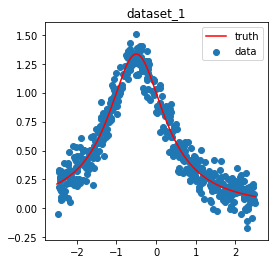

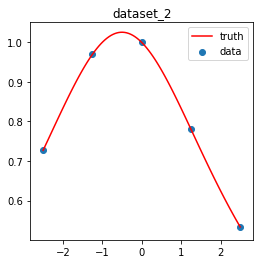

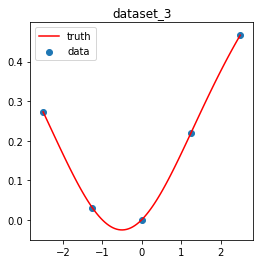

In [4]:
def get_dataset_1d_1():
    def f(X):
        return 1 / (1 + (X[:,0])**2 + X[:,0]) 

    SIGMA=0.1
    N_train = 500
    np.random.seed(0)
    X_train = 5*(np.random.rand(N_train, 1) - 0.5)
    y_train = f(X_train) + SIGMA*np.random.randn(N_train)
    X_plt = 5*(np.linspace(0,1,N_train) - 0.5).reshape(-1,1)    
    return (X_train,y_train,X_plt, f, "dataset_1")


def get_dataset_1d_2():
    def f(X):
        return 10. / (10 + (X[:,0])**2 + X[:,0]) 
        #return 1 + X[:,0]+ X[:,0]**2

    SIGMA=0
    N_train = 5
    np.random.seed(1)
    X_train = 5*(np.linspace(0,1,N_train).reshape(-1,1) - 0.5)
    y_train = f(X_train) + SIGMA*np.random.randn(N_train)
    X_plt = 5*(np.linspace(0,1,100) - 0.5).reshape(-1,1)
    return (X_train,y_train,X_plt,f, "dataset_2")
        
    
def get_dataset_1d_3():
    def f(X):
        return 1 - 10. / (10 + (X[:,0])**2 + X[:,0]) 
        #return 1 + X[:,0]+ X[:,0]**2

    SIGMA=0
    N_train = 5
    np.random.seed(1)
    X_train = 5*(np.linspace(0,1,N_train).reshape(-1,1) - 0.5)
    y_train = f(X_train) + SIGMA*np.random.randn(N_train)
    X_plt = 5*(np.linspace(0,1,100) - 0.5).reshape(-1,1)
    return (X_train,y_train,X_plt,f, "dataset_3")
        


numbers = {}


dataset_1d_1 = get_dataset_1d_1()        
plot_dataset(dataset_1d_1)

dataset_1d_2 = get_dataset_1d_2() 
plot_dataset(dataset_1d_2)

dataset_1d_3 = get_dataset_1d_3() 
plot_dataset(dataset_1d_3)

## Ridge: gaussian kernel

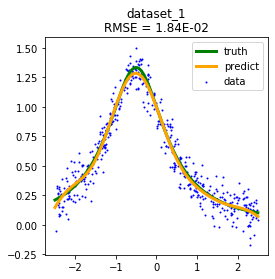

KernelRidge(alpha=0.005, coef0=1, degree=3, gamma=0.5, kernel='rbf',
            kernel_params=None)


In [5]:
param_grid = {
    "alpha": [1E-4, 1E-3, 5E-3, 1E-2, 1E-1, 5E-1, 1E0],
    "kernel": ["rbf"],
    "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2]
}

plot1D(GridSearchCV(KernelRidge(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="ridge: gaussian kernel")


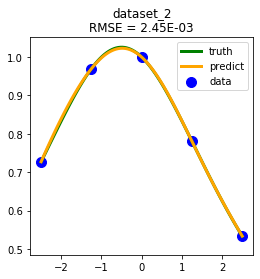

KernelRidge(alpha=0.0001, coef0=1, degree=3, gamma=0.2, kernel='rbf',
            kernel_params=None)


In [85]:
param_grid = {
    "alpha": [1E-4],
    "kernel": ["rbf"],
    "gamma": np.linspace(0.1, 0.2, 100)
}

plot1D(GridSearchCV(KernelRidge(gamma=0.25, alpha=0.001),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="ridge: gaussian kernel",
       s=100)

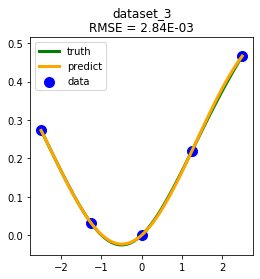

KernelRidge(alpha=0.0001, coef0=1, degree=3, gamma=0.1, kernel='rbf',
            kernel_params=None)


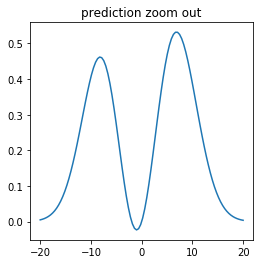

[ 1.6079701  -2.29711176  1.58580112 -1.27763302  1.14149301]


In [12]:
param_grid = {
    "alpha": [1E-4],
    "kernel": ["rbf"],
    "gamma": np.linspace(0.1, 0.2, 100)
}
gscv=GridSearchCV(KernelRidge(gamma=0.25, alpha=0.001),
                    param_grid=param_grid,
                    cv=even_odd_spliter())
plot1D(gscv,
       dataset=dataset_1d_3,
       label="ridge: gaussian kernel",
       s=100)



plt.figure(figsize=(4,4))
plt.plot(np.linspace(-20,20,100), gscv.best_estimator_.predict(np.linspace(-10,10,100).reshape(-1,1)))
plt.title("prediction zoom out")
plt.show()
print(gscv.best_estimator_.dual_coef_)

## Ridge: polynominal kernel

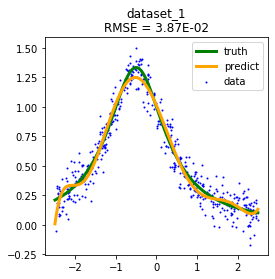

KernelRidge(alpha=0.1, coef0=10, degree=8, gamma=2, kernel='poly',
            kernel_params=None)


In [8]:
param_grid = {
    "alpha": [1E-2, 0.1, 1, 2, 5, 10],
    "kernel": ['poly'],
    "degree": [8],
    "coef0": [0.5, 1, 2, 5, 10],
    "gamma": [1E-2, 0.1, 0.5, 1, 2]
}

plot1D(GridSearchCV(KernelRidge(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="ridge: polynominal kernel")

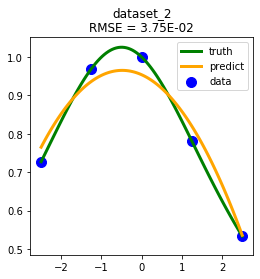

KernelRidge(alpha=5, coef0=5, degree=6, gamma=0.01, kernel='poly',
            kernel_params=None)


In [9]:
param_grid = {
    "alpha": [1E-2, 0.1, 1, 2, 5, 10],
    "kernel": ['poly'],
    "degree": [6, 7, 8, 9, 10, 11],
    "coef0": [0.5, 1, 2, 5, 10],
    "gamma": [1E-2, 0.1, 0.5, 1, 2]
}

plot1D(GridSearchCV(KernelRidge(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="ridge: polynominal kernel",
       s=100)

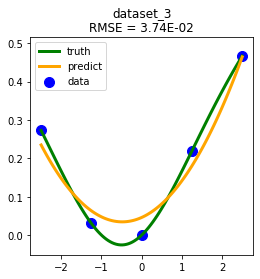

KernelRidge(alpha=5, coef0=5, degree=6, gamma=0.01, kernel='poly',
            kernel_params=None)


In [44]:
param_grid = {
    "alpha": [1E-2, 0.1, 1, 2, 5, 10],
    "kernel": ['poly'],
    "degree": [6, 7, 8, 9, 10, 11],
    "coef0": [0.5, 1, 2, 5, 10],
    "gamma": [1E-2, 0.1, 0.5, 1, 2]
}

plot1D(GridSearchCV(KernelRidge(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_3,
       label="ridge: polynominal kernel",
       s=100)

## Ridge: natrual quadratic splines

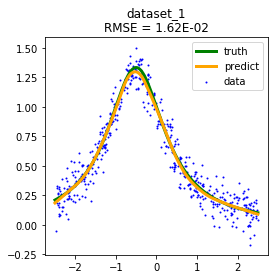

QuadraticSplineRegression(knots[8]=[-2.         -1.42857143 -0.85714286 -0.28571429  0.28571429  0.85714286
  1.42857143  2.        ],alpha=1.0E-03,alphac=1.0E-06)


In [10]:
from quadratic_spline_regression import QuadraticSplineRegression
import quadratic_spline_regression
from imp import reload
reload(quadratic_spline_regression)

param_grid = {
    "knots": [
        np.linspace(-2, 2, 6),
        np.linspace(-2, 2, 8),
        np.linspace(-2, 2, 9),
        np.linspace(-2, 2, 10),
        np.linspace(-2, 2, 12)
    ],
    "alpha": [0, 1E-10, 1E-9, 1E-8, 1E-6, 1E-3, 1E-1],
    "alphac": [0, 1E-10, 1E-9, 1E-8, 1E-6, 1E-3, 1E-1],
}

plot1D(GridSearchCV(QuadraticSplineRegression(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="ridge: splines")

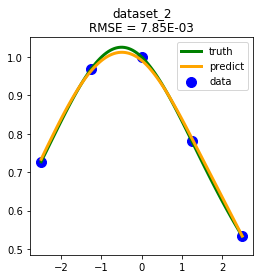

QuadraticSplineRegression(knots[12]=[-2.5        -2.04545455 -1.59090909 -1.13636364 -0.68181818 -0.22727273
  0.22727273  0.68181818  1.13636364  1.59090909  2.04545455  2.5       ],alpha=1.0E-06,alphac=1.0E-02)


In [11]:
from quadratic_spline_regression import QuadraticSplineRegression
#import quadratic_spline_regression
#from imp import reload
#reload(quadratic_spline_regression)

param_grid = {
    "knots": [
        np.linspace(-2.5, 2.5, 6),
        np.linspace(-2.5, 2.5, 7),
        np.linspace(-2.5, 2.5, 8),
        np.linspace(-2.5, 2.5, 9),
        np.linspace(-2.5, 2.5, 10),
        np.linspace(-2.5, 2.5, 12)
    ],
    "alpha": [ 1E-6, 1E-4, 1E-3, 1E-2, 1E-1],
    "alphac": [ 1E-6, 1E-4, 1E-3, 1E-2, 1E-1],
}

plot1D(GridSearchCV(QuadraticSplineRegression(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="ridge: splines",
       s=100)

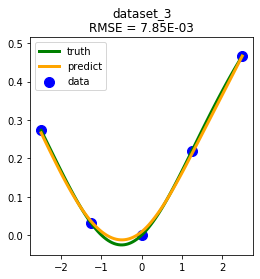

QuadraticSplineRegression(knots[12]=[-2.5        -2.04545455 -1.59090909 -1.13636364 -0.68181818 -0.22727273
  0.22727273  0.68181818  1.13636364  1.59090909  2.04545455  2.5       ],alpha=1.0E-06,alphac=1.0E-02)


In [12]:
from quadratic_spline_regression import QuadraticSplineRegression
#import quadratic_spline_regression
#from imp import reload
#reload(quadratic_spline_regression)

param_grid = {
    "knots": [
        np.linspace(-2.5, 2.5, 6),
        np.linspace(-2.5, 2.5, 7),
        np.linspace(-2.5, 2.5, 8),
        np.linspace(-2.5, 2.5, 9),
        np.linspace(-2.5, 2.5, 10),
        np.linspace(-2.5, 2.5, 12)
    ],
    "alpha": [ 1E-6, 1E-4, 1E-3, 1E-2, 1E-1],
    "alphac": [ 1E-6, 1E-4, 1E-3, 1E-2, 1E-1],
}

plot1D(GridSearchCV(QuadraticSplineRegression(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_3,
       label="ridge: splines",
       s=100)

## Support vector machine: gaussian kernel

In [ ]:
param_grid = {
    "C" : [1E6, 1E5, 1E3, 1, 0.1], "epsilon":[0.02, 0.05, 0.1, 0.5], "kernel": ["rbf"], "gamma":[0.1, 0.25, 0.5, 0.75, 1]
}

svr = SVR(kernel="rbf")
gscv = GridSearchCV(svr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt)
print(gscv.best_estimator_)

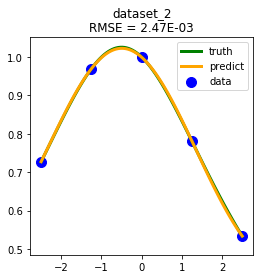

SVR(C=10000000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001,
    gamma=0.1, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)
[[-0.68764792  0.69522374  0.53622821 -0.31956744 -0.22423659]]
[0.63003056]


In [63]:
param_grid = {
    "C": [1E7, 1E6, 1E5, 1E3, 1, 0.1],
    "epsilon": [1E-4, 1E-3, 1E-2, 0.02, 0.05, 0.1],
    "kernel": ["rbf"],
    "gamma": [0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.75, 1]
}


gscv=GridSearchCV(SVR(), param_grid=param_grid, cv=even_odd_spliter())
plot1D(gscv,
       dataset=dataset_1d_2,
       label="SVM: gaussian kernel",
       s=100)
print(gscv.best_estimator_.dual_coef_)
print(gscv.best_estimator_.intercept_)

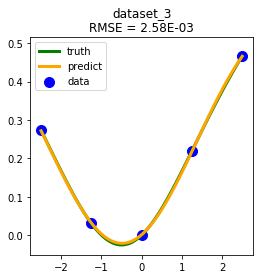

SVR(C=10000000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
[[ 0.67552438 -0.68799642 -0.51116096  0.27969268  0.24394032]]
[0.36950682]


In [64]:
param_grid = {
    "C": [1E7, 1E6, 1E5, 1E3, 1, 0.1],
    "epsilon": [1E-4, 1E-3, 1E-2, 0.02, 0.05, 0.1],
    "kernel": ["rbf"],
    "gamma": [0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.75, 1]
}

gscv=GridSearchCV(SVR(), param_grid=param_grid, cv=even_odd_spliter())
plot1D(gscv,
       dataset=dataset_1d_3,
       label="SVM: gaussian kernel",
       s=100)

print(gscv.best_estimator_.dual_coef_)
print(gscv.best_estimator_.intercept_)

## Local weighted average (kernel regression):  k-neighbors $\oplus$ uniform kernel

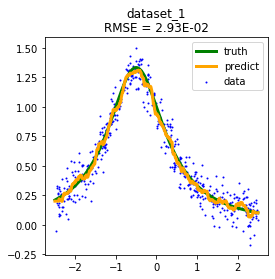

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='uniform')


In [15]:
param_grid = {"n_neighbors": [1, 2, 4, 8, 16, 32, 64, 128]}

plot1D(GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="k-nn")

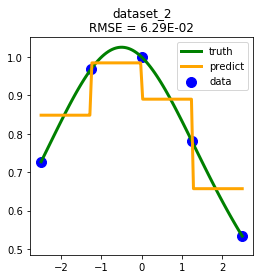

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')


In [16]:
param_grid = {"n_neighbors": np.arange(1,max(4, dataset_1d_2[0].shape[0]//2),1)}

plot1D(GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="k-nn", s=100)

## Local weighted average (kernel regression): radius neighbors $\oplus$ uniform kernel

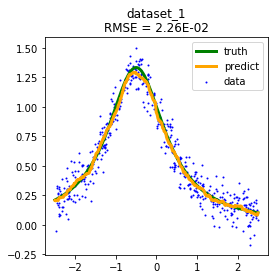

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, p=2,
                         radius=0.19473684210526315, weights='uniform')


In [17]:
param_grid = {"radius": np.linspace(0.1, 1, 20)}

plot1D(GridSearchCV(RadiusNeighborsRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="radius-nn")

In [18]:
if dataset_1d_2[0].shape[0]//2 >= 10:

    param_grid = {"radius": np.linspace(0.6, 1, 20)}

    plot1D(GridSearchCV(RadiusNeighborsRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
           dataset=dataset_1d_2,
           label="radius-nn")

## Local weighted average (kernel regression): k-neighbors $\oplus$  tri-cube kernel

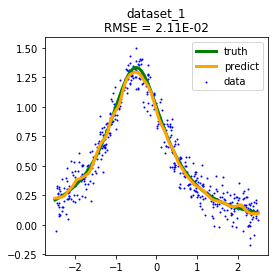

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=1.00E-01, adaptive=1, degree=0)


In [19]:
from LocalRegressor import LocalRegressor

param_grid = {
    "degree": [0],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 100),
}

plot1D(GridSearchCV(LocalRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="knn tri-cube")

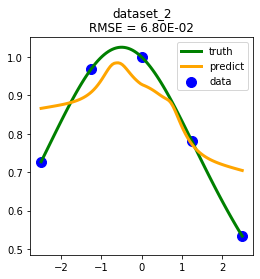

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=6.73E-01, adaptive=1, degree=0)


In [20]:
from LocalRegressor import LocalRegressor

param_grid = {
    "degree": [0],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 100),
}

plot1D(GridSearchCV(LocalRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="knn tri-cube", s=100)

## local regression: k-neighbors $\oplus$ linear $\oplus$ tri-cube kernel

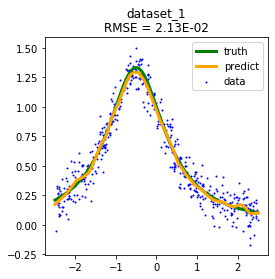

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=1.00E-01, adaptive=1, degree=1)


In [21]:
param_grid = {
    "degree": [1],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 20),
}

plot1D(GridSearchCV(LocalRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="local linear regression")

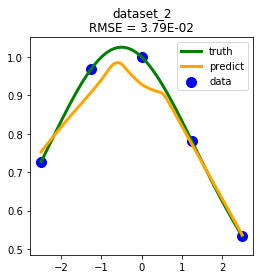

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=6.68E-01, adaptive=1, degree=1)


In [22]:
param_grid = {
    "degree": [1],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 20),
}

plot1D(GridSearchCV(LocalRegressor(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="local linear regression",
       s=100)

## local regression: k-neighbors $\oplus$ quadratic $\oplus$ tri-cube kernel

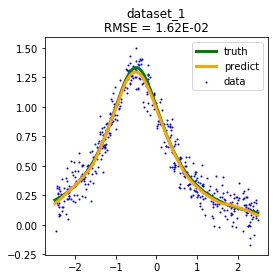

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=2.89E-01, adaptive=1, degree=2)


In [23]:
param_grid = {
    "degree": [2],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 20),
}

plot1D(GridSearchCV(LocalRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="local quadratic regression")

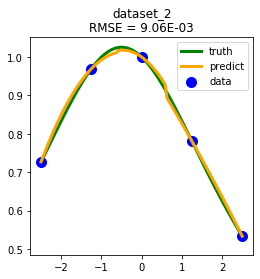

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=6.68E-01, adaptive=1, degree=2)


In [24]:
param_grid = {
    "degree": [2],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 20),
}

plot1D(GridSearchCV(LocalRegressor(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="local quadratic regression",
       s=100)

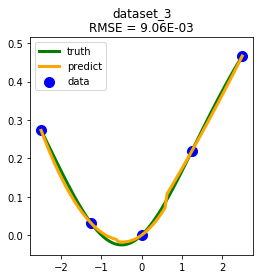

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=6.68E-01, adaptive=1, degree=2)


In [49]:
param_grid = {
    "degree": [2],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 20),
}

plot1D(GridSearchCV(LocalRegressor(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_3,
       label="local quadratic regression",
       s=100)

## Gaussian process

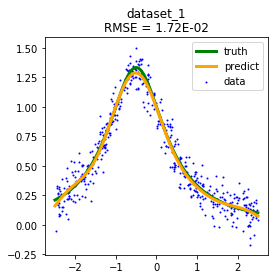

0.505**2 * RBF(length_scale=0.826) + WhiteKernel(noise_level=0.00976)


In [25]:
plot1D(GaussianProcessRegressor(kernel=ConstantKernel(1) * RBF(1) +
                                WhiteKernel(0.1),
                                n_restarts_optimizer=10),
       dataset=dataset_1d_1,
       label="gaussian process")

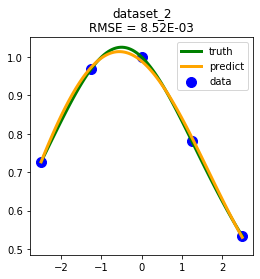

0.577**2 * RBF(length_scale=3.15) + WhiteKernel(noise_level=0.000258)
alpha: [  1.27385067 -16.4624822   41.86159097 -36.55258363  12.57082136]


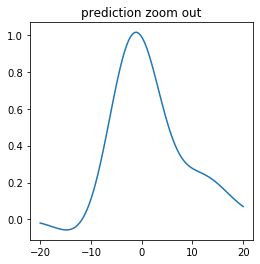

In [80]:
gpr=GaussianProcessRegressor(kernel=ConstantKernel(0.3) * RBF(1) +
                                WhiteKernel(0.01),
                                n_restarts_optimizer=10,
                                alpha=0,
                                random_state=0)
plot1D(gpr,
       dataset=dataset_1d_2,
       label="gaussian process",
       s=100)

print("alpha:", gpr.alpha_)
plt.figure(figsize=(4,4))
plt.plot(np.linspace(-20,20,100), gpr.predict(np.linspace(-10,10,100).reshape(-1,1)))
plt.title("prediction zoom out")
plt.show()

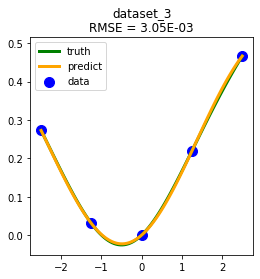

0.425**2 * RBF(length_scale=2.64) + WhiteKernel(noise_level=1e-05)
alpha: [  7.67930194  -0.95983983 -15.95839614  13.46371754  -0.19310162]


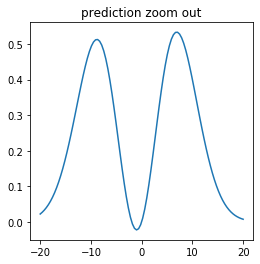

In [73]:
gpr=GaussianProcessRegressor(kernel=ConstantKernel(0.3) * RBF(1) +
                                WhiteKernel(0.01),
                                n_restarts_optimizer=10,
                                alpha=0,
                                random_state=0)
plot1D(gpr,
       dataset=dataset_1d_3,
       label="gaussian process",
       s=100)

print("alpha:", gpr.alpha_)
plt.figure(figsize=(4,4))
plt.plot(np.linspace(-20,20,100), gpr.predict(np.linspace(-10,10,100).reshape(-1,1)))
plt.title("prediction zoom out")
plt.show()

## Decision  tree

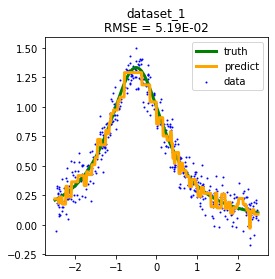

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [28]:
param_grid = {
    "criterion": ['mse'],
    "splitter": ["best"],
    "max_depth": [5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 10],
}

plot1D(GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="decision tree")

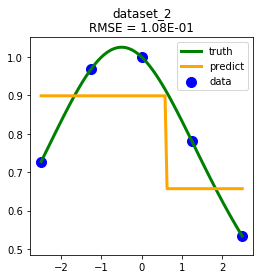

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [29]:
param_grid = {
    "criterion": ['mse'],
    "splitter": ["best"],
    "max_depth": [5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 10],
}

plot1D(GridSearchCV(DecisionTreeRegressor(),
                    param_grid=param_grid,
                    cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="decision tree",
       s=100)

## Random forest

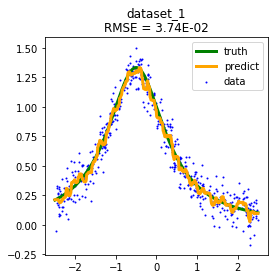

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [30]:
param_grid = {
    "n_estimators": [50, 100, 200, 500],
    "criterion": ["mse"],
    "max_depth": [5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 10],
}

plot1D(GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="random forest")

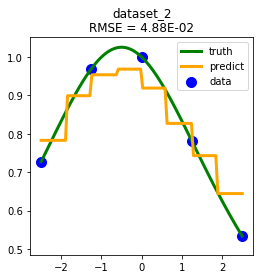

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [31]:
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "criterion": ["mse"],
    "max_depth": [5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 10],
}

plot1D(GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="random forest",s=100)

## AdaBoost

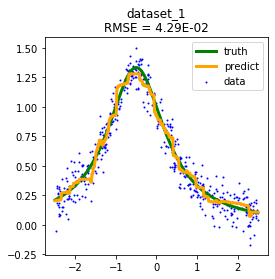

AdaBoostRegressor(base_estimator=None, learning_rate=2.0, loss='exponential',
                  n_estimators=150, random_state=None)


In [32]:
param_grid = {
    "n_estimators": [20, 50, 100, 150],
    "learning_rate": [0.5, 1.0, 2.0],
    "loss": ["linear", 'square', 'exponential']
}

plot1D(GridSearchCV(AdaBoostRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="AdaBoost")

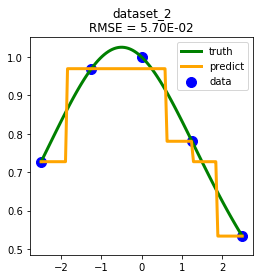

AdaBoostRegressor(base_estimator=None, learning_rate=2.0, loss='linear',
                  n_estimators=150, random_state=None)


In [33]:
param_grid = {
    "n_estimators": [20, 50, 100, 150],
    "learning_rate": [0.5, 1.0, 2.0],
    "loss": ["linear", 'square', 'exponential']
}

plot1D(GridSearchCV(AdaBoostRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="AdaBoost", s=100)

## Gradient boosting decision tree

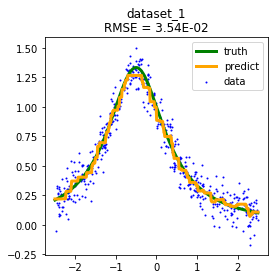

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [34]:
param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.02, 0.05, 0.1, 0.5],
    "min_samples_leaf": [1, 2, 5, 10],
    "loss": ["ls", 'lad'],
    "max_depth": [1, 2, 3]
}

plot1D(GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=2),
       dataset=dataset_1d_1,
       label="GBDT")

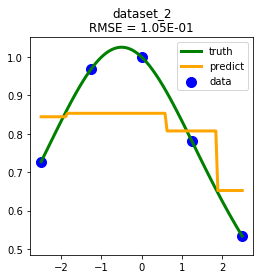

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [35]:
param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.02, 0.05, 0.1, 0.5],
    "min_samples_leaf": [1, 2, 5, 10],
    "loss": ["ls", 'lad'],
    "max_depth": [1, 2, 3]
}

plot1D(GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="GBDT",s=100)

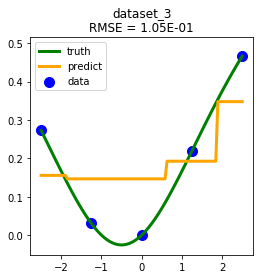

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [47]:
param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.02, 0.05, 0.1, 0.5],
    "min_samples_leaf": [1, 2, 5, 10],
    "loss": ["ls", 'lad'],
    "max_depth": [1, 2, 3]
}

plot1D(GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_3,
       label="GBDT",s=100)

## Multi-layer Perceptron regressor

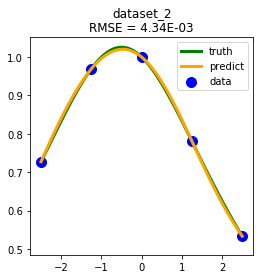

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=1e-07,
             validation_fraction=0.1, verbose=False, warm_start=False)


In [37]:
param_grid = {
    #"hidden_layer_sizes":[(2)],
    "hidden_layer_sizes":[(1), (3), (10), (100), (1000), (100,50,50)],
    "activation": ["tanh"],
    "solver": ["lbfgs"],
    "learning_rate": ['constant' ],
    "learning_rate_init": [1E-3],
    "max_iter": [10000],
    "tol":[1E-7],
    "alpha":[1E-2, 1E-3, 1E-4]
}

#m = MLPRegressor(hidden_layer_sizes=(1000), activation="relu", solver="lbfgs", alpha=1E-3, tol=1E-10)
#m.fit(dataset_1d_2[0], dataset_1d_2[1])
# should be identity
#print(m.out_activation_)
#print(m.coefs_)
#print(m.intercepts_)

plot1D(GridSearchCV(MLPRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_2,
       label="Multi-layer Perceptron",
       s=100)

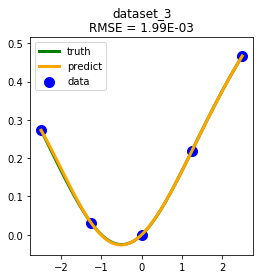

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=3, learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=1e-07,
             validation_fraction=0.1, verbose=False, warm_start=False)


In [42]:
param_grid = {
    #"hidden_layer_sizes":[(2)],
    "hidden_layer_sizes":[(1), (3), (10), (100), (1000), (100,50,50)],
    "activation": ["tanh"],
    "solver": ["lbfgs"],
    "learning_rate": ['constant' ],
    "learning_rate_init": [1E-3],
    "max_iter": [10000],
    "tol":[1E-7],
    "alpha":[1E-2, 1E-3, 1E-4]
}

plot1D(GridSearchCV(MLPRegressor(), param_grid=param_grid, cv=even_odd_spliter()),
       dataset=dataset_1d_3,
       label="Multi-layer Perceptron",
       s=100)

## Summary

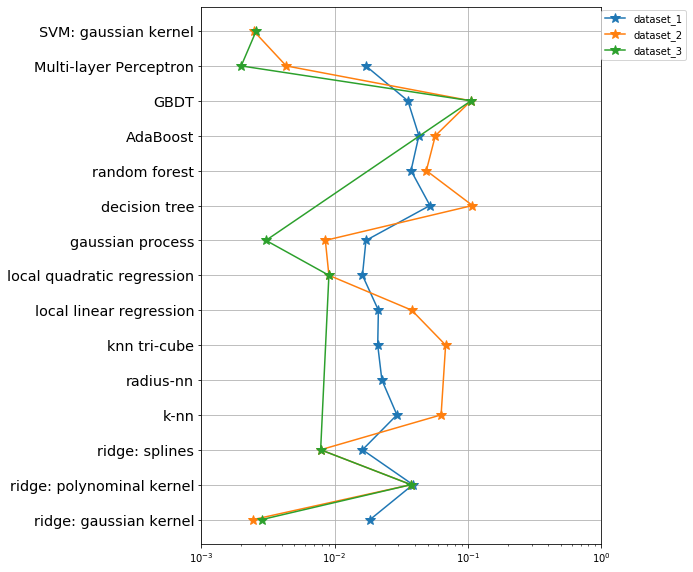

In [90]:
def scale(k, s=0.5):
    if k in keys:
        i = keys.index(k)
        values[i] *= s
        keys[i] = "%s * %.1f"%(keys[i], s)


def plot_perf():
    
    plt.figure(figsize=(12,8))
    
    cnt = 0
    key_to_index= {}
    keys_list=[]
    for dataset in numbers: 
        kv = numbers[dataset]
        
        for key in kv.keys():
            if key not in key_to_index:
                key_to_index[key] =  cnt
                keys_list.append(key)
                cnt += 1
                

    for dataset in numbers:
        
        kv = numbers[dataset]
        
        ks = []
        vs = []
        for key in kv.keys():
            ks.append(key_to_index[key])
            vs.append(kv[key])
            
            
        ks, vs = zip(*sorted(zip(ks, vs)))
        
        plt.plot(vs, ks, marker="*", markersize=10, label=dataset)
        plt.yticks(ticks=range(len(keys_list)), labels=keys_list, fontsize="x-large")
        plt.xlim((1E-3,1))
    
    plt.tight_layout()
    plt.xscale('log')
    plt.grid()
    plt.subplots_adjust(right=0.7)
    plt.legend(loc=(1.0,0.9))
    plt.show()
    

plot_perf()

# 2D

In [116]:
from mpl_toolkits.mplot3d import Axes3D

def fit_plot3d_reg(X_train, y_train, knots, reg, X_test = None, y_test = None,\
                   xlim=(-1,1), ylim=(-1,1), zlim=(-1,1), ax=None, sz=20):
    y_train =np.array(y_train)
    X_train = np.array(X_train)
    
    reg.fit(X_train, y_train)
    
    #reg.dual_coef_[:] = 0
    #reg.dual_coef_[50] = 1
    
    
    x_plt = np.linspace(xlim[0], xlim[1], 100)
    y_plt = np.linspace(ylim[0], ylim[1], 100)
    xx, yy = np.meshgrid(x_plt, y_plt)

    yhat_train = reg.predict(X_train)
    up = y_train > yhat_train
    down = y_train <= yhat_train
    
    if np.any(up):
        ax.scatter(X_train[:,0][up], X_train[:,1][up], y_train[up], s=sz, color="red")
    if np.any(down):
        ax.scatter(X_train[:,0][down], X_train[:,1][down], y_train[down], s=sz, color="green")
    
    from matplotlib import cm
    ax.plot_surface(xx, yy, reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(100,100), alpha=0.3, cmap=cm.coolwarm)
    
    if knots is not None:
        for k1 in knots[0]:
            ax.plot([k1, k1],[-1,1],[0,0], linestyle="--", color="blue")
        for k2 in knots[1]:
            ax.plot([-1, 1],[k2, k2],[0,0], linestyle="--", color="blue")
        
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$y$")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    err = y_train-reg.predict(X_train)
    mse = np.sqrt(np.square(err).mean())
    
    if X_test is not None and y_test is not None:
        err = y_test-reg.predict(X_test)
        mse2 = np.sqrt(np.square(err).mean())
        maxe = np.max(np.abs(err))
        ax.set_title("RMSE(Train) = %.1E,\nRMSE(Test) = %.1E,\nMAX_ERR(Test) = %.1E"%(mse, mse2, maxe))
    else:
        maxe = np.max(err)
        ax.set_title("RMSE(Train) = %.1E,\nMAX_ERR(Train) = %.1E"%(mse, maxe))
    
    return reg


def optimize_reg(reg, param_grid, n_jobs=1):
    
    gscv=GridSearchCV(reg, param_grid = param_grid, cv = train_validation_spliter(len(X_train)),\
                      refit=False, verbose=0, n_jobs=n_jobs)
    
    gscv.fit(np.vstack((X_train, X_test)), np.append(y_train, y_test))
    reg.set_params(**gscv.best_params_)
    
    print(gscv.best_params_)

    fig=plt.figure(figsize=(4,4))
    ax1 = fig.add_subplot(1,1,1, projection="3d")

    fit_plot3d_reg(X_train=X_train, y_train=y_train, reg=reg, knots=None, X_test=X_test, y_test=y_test,\
                              xlim=(-1,1), ylim=(-1,1), zlim=(0,2), ax=ax1, sz=10)

    plt.tight_layout()
    plt.show()
    

## data

In [193]:

def get_dataset(uniform_smear=0.01):
    def f21(X):
        return X[:,0]**4 + 1/(1+0.3*X[:,1])


    Ndata=100*100
    N=2
    N_grid=10

    X_rnd=2*np.random.rand(Ndata,N)-1

    X_grid=np.zeros((N_grid*N_grid, N))
    c=0

    x1=np.linspace(-1,1,N_grid)
    x2=np.linspace(-1,1,N_grid)

    for i in range(N_grid):
        for j in range(N_grid):
            X_grid[c,0] = x1[i]
            X_grid[c,1] = x1[j]
            c += 1

    X_train = X_grid     
    y_train = f21(X_train) + uniform_smear*(np.random.rand(X_train.shape[0]) - 0.5)
    X_test = X_rnd
    y_test = f21(X_test)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = get_dataset(uniform_smear=0)

## Spline ridge with explicit knots

{'alpha': 0, 'knots': [array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]), array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])]}


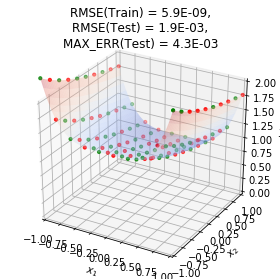

In [117]:
#from imp import reload
#import quadratic_spline_regression
#reload(quadratic_spline_regression)
from quadratic_spline_regression import QuadraticSplineRegressor

qsr = QuadraticSplineRegressor()

param_grid={
    "knots": [     [ np.linspace(-1,1,n)]*2  for n in range(9,11)   ],
    "alpha": [0, 1E-10, 1E-9, 1E-8, 1E-7, 1E-6, 1E-5, 1E-4, 1E-3],
}

optimize_reg(qsr, param_grid=param_grid)

## Ridge with B-spline kernel

C:\Users\liangh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


{}


C:\Users\liangh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


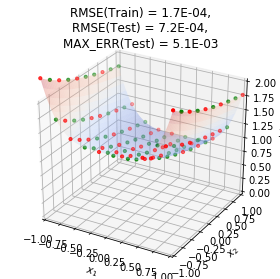

In [212]:
from imp import reload
import bspline_kernel
reload(bspline_kernel)
from bspline_kernel import BSplineKernel_Ridge
from bspline_kernel import BSplineKernel
from sklearn.metrics.pairwise import rbf_kernel

# sigma = sqrt((2n+1+1)/12) * dw
# gamma = 1/(2*sigma**2)
# dw = sqrt(1/(2*gamma)) / sqrt((2n+2)/12)

n=8
gamma=0.166
dw = np.sqrt(1/(2*0.166)) / np.sqrt((2*n+2)/12)

bskr = BSplineKernel_Ridge(dw=dw, degree=n)



def rbf(x, y):
    return  np.exp(-0.166* ((x-y)**2).sum() )


# k1 = BSplineKernel(dw=dw, degree=n)(X_train, X_train)
# k2 = rbf_kernel(X_train, gamma=gamma)

# _,S1,_=np.linalg.svd(k1)
# _,S2,_=np.linalg.svd(k2)

# plt.figure(figsize=(4,4))
# plt.plot(S1, label="BSpline")
# plt.plot(S2, label="RBF")
# plt.yscale("log")
# plt.legend()


kr = KernelRidge(kernel=bskr, alpha=1E-13)

param_grid={ }

optimize_reg(kr, param_grid=param_grid)

## ridge with gaussian kernel

{'alpha': 1e-13, 'gamma': 0.18424195408751742}


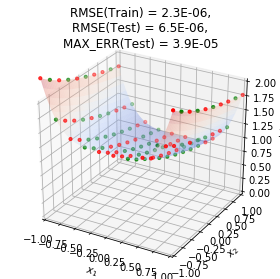

In [178]:
from sklearn.kernel_ridge import KernelRidge
    
kr = KernelRidge(kernel="rbf")

param_grid={
    "gamma": 0.5/np.linspace(0.1, 5, 20)**2,
    "alpha": [ 1E-13, 1E-12, 1E-11, 1E-9, 1E-8, 1E-7, 1E-6],
}

optimize_reg(kr, param_grid=param_grid)

## $\epsilon$-SVR with gaussian kernel

{'C': 10000000000.0, 'epsilon': 1e-05, 'gamma': 0.8324661810613943}


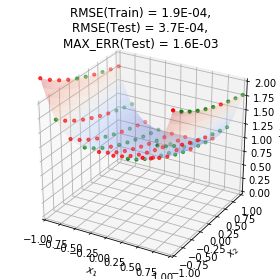

In [83]:
from sklearn.svm import SVR, NuSVR

svr = SVR(kernel="rbf")

param_grid={
    "gamma": 0.5/np.linspace(0.1, 1, 5)**2,
    "epsilon": [1E-5, 1E-4, 1E-3, 1E-2],
    "C":[1E10],
}

optimize_reg(svr, param_grid=param_grid, n_jobs=-1)

## $\nu$-SVR with gaussian kernel


{'C': 10000.0, 'gamma': 0.8324661810613943, 'nu': 0.99}


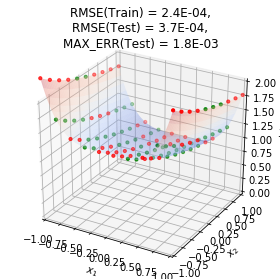

In [11]:
from sklearn.svm import SVR, NuSVR

nsvr = NuSVR(kernel="rbf")

param_grid={
    "gamma": [0.8324661810613943],
    "nu": np.linspace(0.99,0.9999, 1),
    "C":[10000.0],
}

optimize_reg(nsvr, param_grid=param_grid, n_jobs=-1)